In [765]:
import pydotplus 
import math
import pandas as pd
from matplotlib import pyplot
from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

## 1. Теоретические задачи.
### 1.1. Ответы в листьях регрессионного дерева. Оптимальной является стратегия ответа средним значением в листе. Докажем это.
### Предположим, что мы отвечаем значением $\tilde{y}$. Минимизируем значение ошибки  MSE и найдем соответствующее значение $\tilde{y}$.
### $A(\tilde{y}) = E(y - \tilde{y})^2 = Ey^2 - 2\tilde{y}Ey + \tilde{y}^2$
### $\frac{\partial A}{\partial \tilde{y}} = -2Ey + 2\tilde{y} \Rightarrow \tilde{y} = Ey \Rightarrow$ оптимальной стратегией является ответ средним значением таргета в листе.

### 1.2. Линейные модели в деревьях. 
### Дерево приближает реальную кривую ступенчатой функцией $y = const$ таким образом, чтобы минимизировать значение ошибки. В результате в каждом листе находятся объекты, близкие к $y = const \Rightarrow$ применение линейной регрессии не даст никаких ощутимых улучшений. 
### Для того, чтобы применение регрессии имело смысл, нужно изменить принцип построения дерева - приближать не ступенчатой функцией, а ломаной линией.


### 1.3. Unsupervised Decision Tree.
### Найдем энтропию нормального распределения:
## $p(x) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}} \cdot e^{-\frac{1}{2}(x - \mu)^T\cdot \Sigma^{-1} \cdot (x - \mu)}$
## $H(x) = -\int_{-\infty}^{\infty}{p(x)ln(p(x))dx} = -\int_{-\infty}^{\infty}{p(x) \cdot (-\frac{1}{2}ln((2\pi)^n|\Sigma|) dx} - \int_{-\infty}^{\infty}{p(x) \cdot (-\frac{1}{2}(x - \mu)^T |\Sigma|^{-1}(x - \mu))dx} = \frac{1}{2}ln((2\pi)^n|\Sigma|) + \frac{1}{2}\int_{-\infty}^{\infty}{p(x)\cdot(x - \mu)^T|\Sigma|(x - \mu) dx}$
### Рассмотрим отдельно $(x - \mu)^T|\Sigma|(x - \mu) = trace((x - \mu)^T|\Sigma|(x - \mu)) = trace(|\Sigma|(x - \mu)^T(x - \mu)) = trace(E) = n \Rightarrow$
### $H(x) = \frac{1}{2}ln((2\pi)^n|\Sigma|) + \frac{n}{2} = \frac{1}{2}ln((2\pi)^n|\Sigma|) + \frac{1}{2} ln(e^n) = \frac{1}{2}ln\large((2\pi e)^n |\Sigma|$, что и требовалось доказать.

## 2. Применение решающего дерева

In [107]:
InputFile = 'german_credit.csv'
credit_data = pd.read_csv(InputFile)
data_frame = pd.DataFrame(credit_data)
data_frame

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


In [109]:
credit_data_columns = credit_data.columns
data_columns = credit_data_columns[1:]
target_column = credit_data_columns[0]
data = credit_data[data_columns]
target = credit_data[target_column]

In [110]:
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(data, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Рассмотрим дерево с максимальной глубиной 3:


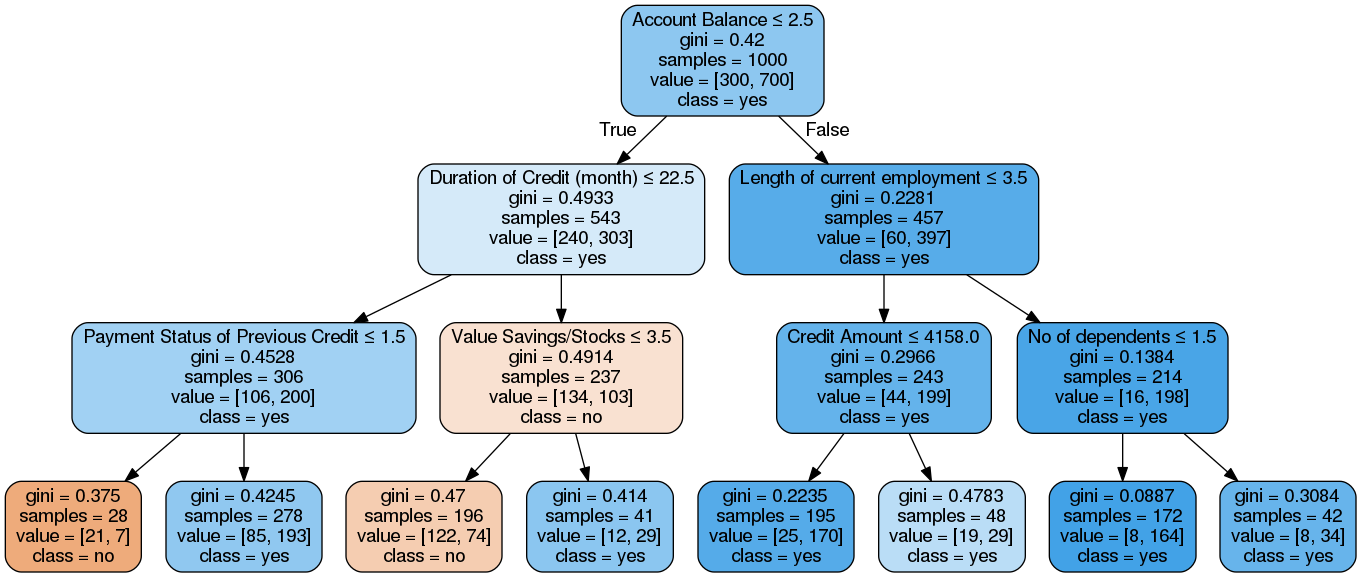

In [111]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", feature_names=data_columns, \
                                class_names={1:'yes', 0: 'no'}, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out") 
print "Рассмотрим дерево с максимальной глубиной 3:"
Image(graph.create_png())

### Выглядит довольно разумно: на первом и втором уровне учтены такие важные характеристики как состояние счета, наличие работы и срок, на который клиент собирается взять кредит. Далее учитывается кредитная история и другие признаки.

Рассмотрим дерево с максимальной глубиной 5. Оно дает более точную классификацию на обучающей выборке (см. критерий Джини), но создает высокий  риск переобучения.


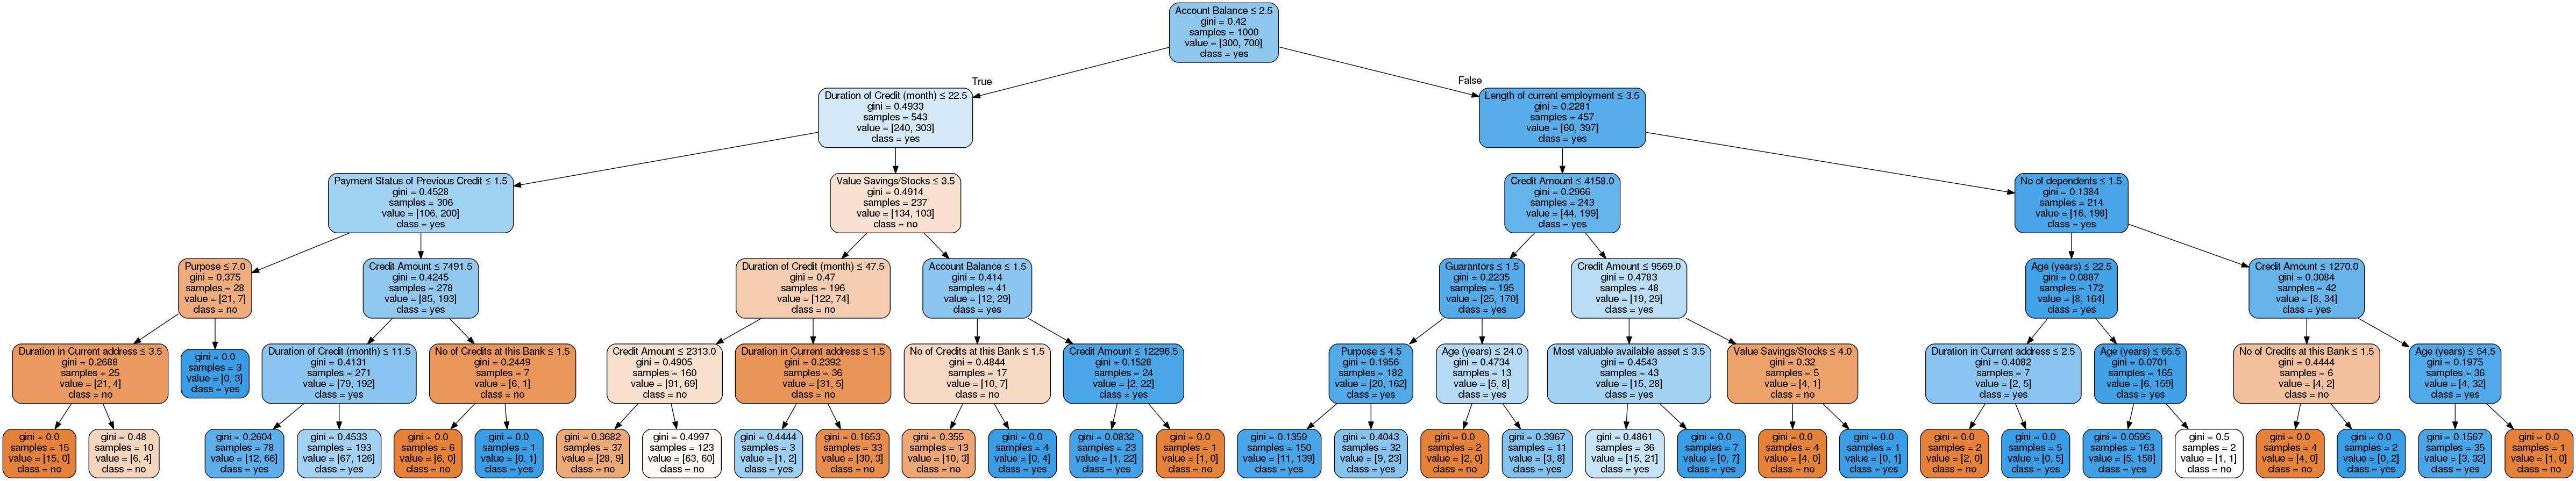

In [112]:
model = tree.DecisionTreeClassifier(max_depth = 5)
model.fit(data, target)
dot_data = tree.export_graphviz(model, out_file="big_tree.out", feature_names=data_columns, \
                                class_names={1:'yes', 0: 'no'}, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graphviz.graph_from_dot_file("big_tree.out") 
print "Рассмотрим дерево с максимальной глубиной 5. Оно дает более точную классификацию на обучающей выборке (см. критерий Джини), но создает\
 высокий  риск переобучения."
Image(graph.create_png())


In [153]:
def count_scores(train_data, train_target, test_data, test_target, N):
    score = []
    cross_score = []
    for i in range(1, N):
        model = tree.DecisionTreeClassifier(max_depth = i)
        model.fit(train_data, train_target)
        score.append(accuracy_score(model.predict(test_data), test_target))
        cross_score.append((cross_val_score(model, test_data, test_target)).mean())
    pyplot.subplot()
    pyplot.plot(np.linspace(1, N, N - 1), score, 'g', label='without cross-validation')
    pyplot.plot(np.linspace(1, N, N - 1), cross_score, label='with cross-validation')
    pyplot.grid(True)
    pyplot.legend(bbox_to_anchor=(1.05, 1), loc = 2)
    pyplot.xlabel('max depth')
    pyplot.ylabel('accuracy')
    pyplot.ylim([0, 1])
    pyplot.show()

На обучающей выборке без кросс-валидации:


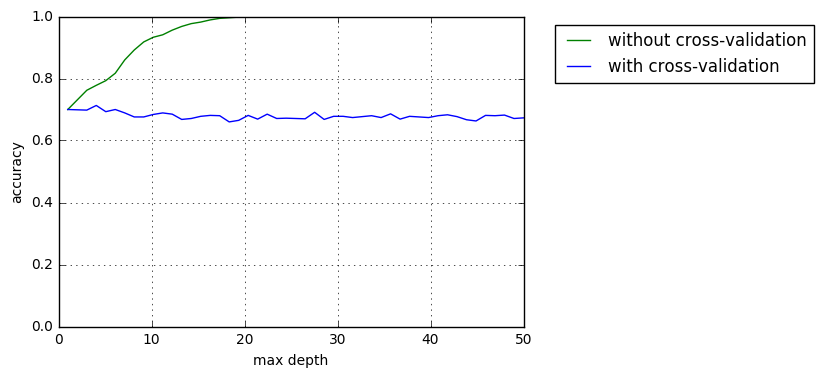

Из графика видно, что при отсутствии кросс-валидации наблюдается сильное переобучение.


In [155]:
print "На обучающей выборке без кросс-валидации:"
N = 50
score = []
train_data = credit_data[data_columns]
train_target = credit_data[target_column]
test_data = credit_data[data_columns]
test_target = credit_data[target_column]
count_scores(train_data, train_target, test_data, test_target, N)
print "Из графика видно, что при отсутствии кросс-валидации наблюдается сильное переобучение."

## 3. Реализация решающего дерева

In [760]:
class node:
    def __init__(self, _data, _target, _depth = 15):
        self.left = None
        self.right = None
        self.feature = None
        self.G = 10**9
        self.depth = _depth
        self.data = _data
        self.target = _target
        self.threshold = 0
        if (_depth > 0):
            left_child_data, right_child_data, left_child_target, right_child_target = self.split(_data, _target)
            self.left = node(left_child_data, left_child_target, _depth - 1)
            self.right = node(right_child_data, right_child_target, _depth - 1)
        
    def H(self, array):
        return ((abs(array - array.mean())**2).mean())**0.5
    def count_G(self, left, right, data):
        left_size = float(len(left))
        right_size = float(len(right))
        data_size = float(len(data))
        return left_size/(data_size) * self.H(left) + left_size/(data_size) * self.H(right)
    def split(self, data, target):
        N = data.shape[1]
        if (N <= 1):
            return None, None, None, None
        for feat in range(0, N):
            for i in set(target):
                new_left_data = data[data[:, feat] <= i]
                new_right_data = data[data[:, feat] > i]
                new_left_target = target[data[:, feat] <= i]
                new_right_target = target[data[:, feat] > i]
                if len(new_left_target) < 1 or len(new_right_target) < 1:
                    continue
                new_G = self.count_G(new_left_target, new_right_target, data)
                if (new_G < self.G):
                    self.G = new_G
                    self.threshold = i
                    self.feature = feat
        tr = self.threshold
        new_left_data = data[data[:, feat] <= tr]
        new_right_data = data[data[:, feat] > tr]
        new_left_target = target[data[:, feat] <= tr]
        new_right_target = target[data[:, feat] > tr]
        return new_left_data, new_right_data, new_left_target, new_right_target
    
    def predict_class(self):
        return self.target.mean()
    def element_prediction(self, element):
        if (self.left == None or self.right == None):
            return self.predict_class()
        else:
            if (element[self.feature] <= self.threshold):
                next_node = self.left
            else:
                next_node = self.right
            return next_node.element_prediction(element)    
        
class decision_tree:
    def __init__(self, _max_depth, _cutting_value = 0.8):
        self.head = None
        self.max_depth = _max_depth
        self.cutting_value = _cutting_value
        self.depth = 0
    def fit(self, _data, _target):
        self.head = node(_data, _target, self.max_depth) 
    def predict(self, _data):
        N = _data.shape[0]
        result_array = np.ndarray(shape = 0)
        for i in range(0, N):
            np.append(result_array, self.head.element_prediction(_data[i]))
        return result_array

In [764]:
from sklearn.datasets import load_boston
boston_data = load_boston()
boston = pd.DataFrame(boston_data.data)
boston.columns = boston_data.feature_names
boston['target'] = boston_data.target
my_tree = decision_tree(4)
train_data = boston_data.data[:0.85 * len(boston_data.data)]
train_target = boston_data.target[:0.85 * len(boston_data.target)]

my_tree.fit(train_data, train_target)
# не успела :(

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
